# <center>Блок 4. Введение в машинное обучение<center>
## <center>ML-2. Обучение с учителем: регрессия<center>
### <center>2.Линейная регрессия: аналитическое решение<center>
#### <center>Аналитическое решение с помощью Numpy<center>

In [1]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
from sklearn import linear_model # линейные модели
from sklearn import metrics # метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('C:\\IDE\data\\Block_4\\asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Text(0, 0.5, 'Correlations coefficient')

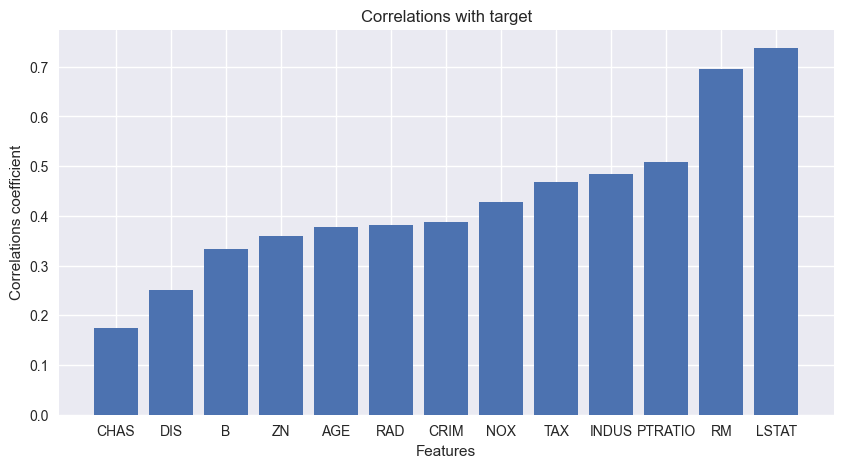

In [4]:
# вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
# удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
# строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) # фигура + координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) # столбчатая диаграмма
ax.set_title('Correlations with target') # название графика
ax.set_xlabel('Features') # название оси x
ax.set_ylabel('Correlations coefficient') # название оси y

In [5]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [6]:
def linear_regression(X, y):
    # создаем вектор из единиц
    ones = np.ones(X.shape[0])
    # добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    # вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    # вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [7]:
# вычисляем параметры линейной регрессии
w = linear_regression(X, y)
# выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
# выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [8]:
# задаем процент низкостатусного населения
x_example = 5.18
# делаем предсказание
y_predict = w[0] + w[1]*x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))

Predicted value: 29.63


In [9]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) # фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) # название оси абсцисс
    ax.set_ylabel(ylabel) # название оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда

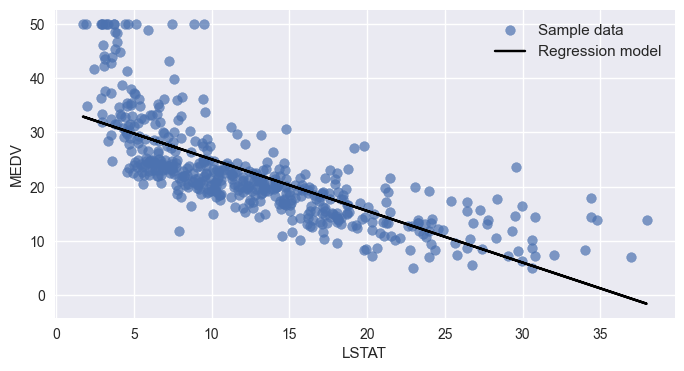

In [10]:
# Делаем предсказание для всех обьектов из таблицы
y_predict = w[0]+w[1]*X
# Строим визуализацию
plot_regression_2d(X, y, y_predict)

#### <center>Аналитическое решение с помощью sklearn<center>

In [11]:
from sklearn import linear_model

In [12]:
# создаем обьект класса Linearregression
lr_lstat = linear_model.LinearRegression()
# обучаем модель - ищем параметры по МНК
lr_lstat.fit(X,y)

print('w0: {}'.format(lr_lstat.intercept_)) # свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) # остальные параметры модели w1, w2,...wm

w0: 34.5538408793831
w1: [-0.95004935]


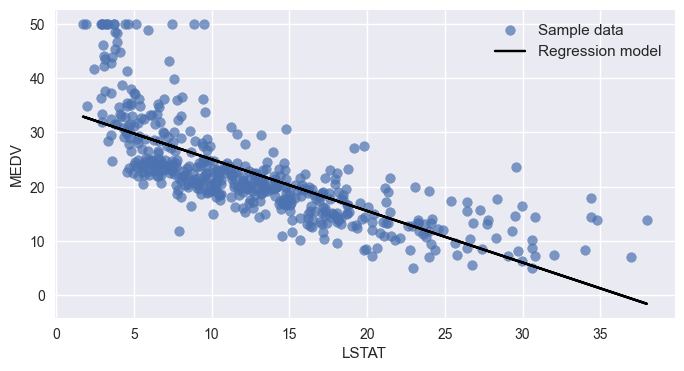

In [13]:
# предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
# строим визуализацию
plot_regression_2d(X, y, y_predict)

In [14]:
# составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
# составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
# создаем обьект класса LinearRegression
lr_full = linear_model.LinearRegression()
# обучаем модель - ищем параметры по МНК
lr_full.fit(X,y)

LinearRegression()

In [15]:
# составляем таблицу из признаков и их коеффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
# составляем строку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


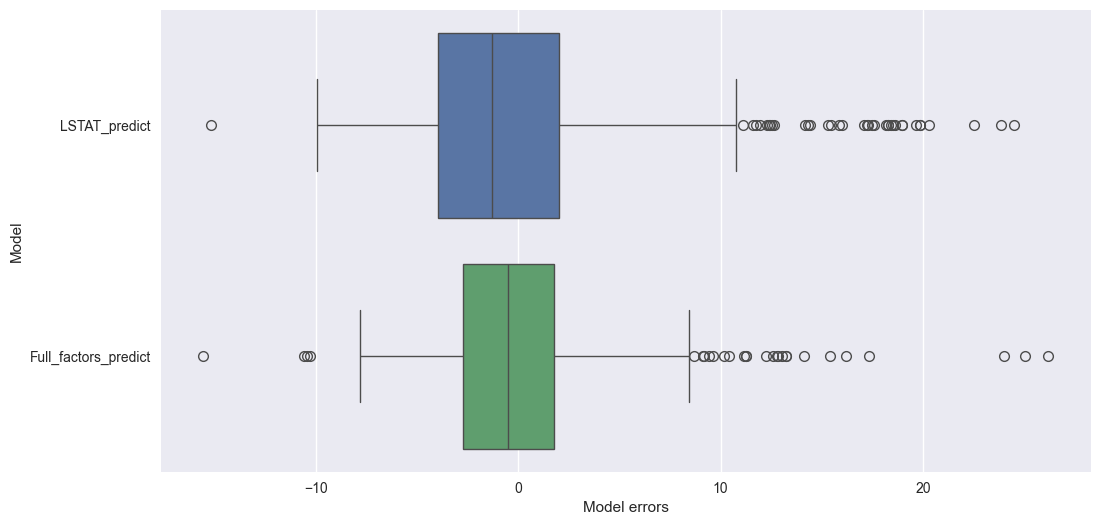

In [16]:
# визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плосткость
# ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
# ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
# для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat,
     'Full_factors_predict': y_errors_full}
)
# строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') # название оси абсцисс
ax.set_ylabel('Model'); # название оси ординат

In [17]:
# Задание 2.7
new_data = list([0.35114, 0.00000, 7.38000, 0.00000, 0.49300, 6.04100, 49.90000, 4.72110, 5.00000, 287.00000, 19.60000, 396.90000, 7.70000, 0.00000])
X = pd.DataFrame(columns=boston_data.columns)
X.loc[0] = new_data
X = X.drop('MEDV', axis=1)
#y = boston_data['MEDV']
display(X)
print(np.round(lr_full.predict(X),2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


[22.87]


In [18]:
# Задание 2.8
#startups_df = pd.read_csv("C:\\IDE\\data\\Block_4\\50_Startups.csv")
#features = startups_df.drop(['Profit', 'State'], axis=1).columns
#X = startups_df[features]
#y = startups_df['Profit']
#lr_full = linear_model.LinearRegression()
#lr_full.fit(X,y)
# составляем таблицу из признаков и их коеффициентов
#coef_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full.coef_})
#print(round(coef_df['Coefficients'],2))

### <center>3.Метрики регрессии. Недостатки аналитического решения<center>
#### <center>Метрики регрессии<center>
#### <center>Расчет метрик на Python<center>

In [19]:
from sklearn import metrics

In [20]:
# Делаем предсказание оп признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
# Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
# Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
# Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat)*100))
# Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


In [21]:
# Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
# Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
# Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
# Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full)*100))
# Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


In [22]:
# Задание 3.2
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.2f} %'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.75 %


In [23]:
# Задание 3.3
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]

print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


#### <center>Недостатки аналитического решения<center>
### <center>4.Линейная регрессия: численное решение<center>
#### <center>Численное решение на Python<center>

In [24]:
import numpy as np # Для матричных вычислений
import pandas as pd # Для анализа и предобработки данных
import matplotlib.pyplot as plt # Для визуализации
import seaborn as sns # Для визуализации
from sklearn import linear_model # Линейные модели
from sklearn import metrics # Метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('C:\\IDE\\data\\Block_4\\asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [25]:
X = boston_data[['LSTAT']] # матрица наблюдений
y = boston_data['MEDV'] # Вектор правильных ответов

In [26]:
# Создаем обьект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
# Обучаем модель - ищем параметры по методу SGD
sgd_lr_lstat.fit(X,y)

SGDRegressor(random_state=42)

In [27]:
print('w0: {}'.format(sgd_lr_lstat.intercept_)) # свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) # остальные параметры модели w1,..w2,...wn

w0: [34.33010969]
w1: [-0.96193242]


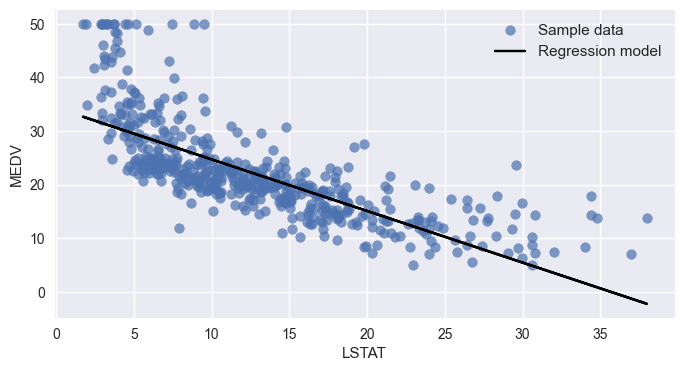

In [28]:
# функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    
    fig,ax = plt.subplots(figsize=(8,4)) # фигура + плоскость координат
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') # диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') # линейный график
    ax.set_xlabel(xlabel) # название оси абсцисс
    ax.set_ylabel(ylabel) # название оси ординат
    ax.legend(facecolor='white', fontsize=11) # легенда
    
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)  
# Строим визуализацию
plot_regression_2d(X,y,y_predict)  

In [29]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y,y_predict)))

R2 score: 0.542


In [30]:
# Составляем список факторов (исключая целевой признак)
features = boston_data.drop('MEDV', axis=1).columns
# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

# Создаем оьект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
# Обучаем модель - ищем параметры по методу SGD
sgd_lr_full.fit(X,y)

# Составляем таблицу из признаков и их коеффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
# Составляем строчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df,intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


In [31]:
# Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
# Рассчитываем коеффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129979358707712.000


In [32]:
from sklearn import preprocessing

# Инициализируем стандартизатор StandartScaler
scaler = preprocessing.StandardScaler()
# Производим стандартизацию
X_scaled = scaler.fit_transform(X)
# Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [33]:
# Создаем обьект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
# Подаем стандартизированные данные
sgd_lr_full.fit(X_scaled,y)

# Составляем таблицу из признаков и их коеффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
# Составляем стрчку таблицы со свободным членом
intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [34]:
# Предсказываем медианную цену для всех участков из набора данных
# Передаем стандартизированные данные
y_predict = sgd_lr_full.predict(X_scaled)
# Рассчитываем коеффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y,y_predict)))

R2 score: 0.740


In [35]:
# Создаем обьект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', # режим темпа обучения - константа
    eta0=0.1, # начальное и постоянное значение темпа обучения
    random_state=42
)

sgd_lr_bad.fit(X_scaled,y)
y_predict = sgd_lr_bad.predict(X_scaled)
print('R2 score: {:.3f}'.format(metrics.r2_score(y,y_predict)))

R2 score: -335415038359.635


In [36]:
# Задание 4.9
sgd_lr_tol = linear_model.SGDRegressor(
    tol=0.1,
    random_state=42
)

sgd_lr_tol.fit(X_scaled,y)
y_predict = sgd_lr_tol.predict(X_scaled)
print('R2 score: {:.3f}'.format(metrics.r2_score(y,y_predict)))

R2 score: 0.735


#### <center>Сравнение аналитического и численного решений<center>
### <center>5.Дилема смещения и разброса. Полиномиальные признаки. Регуляризация.<center>
#### <center>Смещение и разброс<center>

In [37]:
import numpy as np # Для матричных вычислений
import pandas as pd # Для анализа и предобработки данных
import matplotlib.pyplot as plt # Для визуализации
import seaborn as sns # Для визуализации
from sklearn import linear_model # Линейные модели
from sklearn import metrics # Метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('C:\\IDE\\data\\Block_4\\asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [38]:
from sklearn.model_selection import train_test_split

# Разделяем выборку на тренировочную и тестовую в соотношении 70/30
# Устанавливаем random_state для воспроизводимости результатов
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=40)
# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [39]:
# Создаем обьект класса LinearRegression
lr_model = linear_model.LinearRegression()
# Обучаем модель по методу МНК
lr_model.fit(X_train,y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
# Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)

print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

Train R^2: 0.743
Test R^2: 0.722


#### <center>Полиномиальные признаки<center>

In [40]:
from sklearn import preprocessing

# Создаем генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

# Вывоим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)
